In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px

In [30]:
df = pd.read_parquet("/Users/timehmann/Library/Mobile Documents/com~apple~CloudDocs/Studium/Data_Science_Semester3/Data_Analytics_Business_Intelligence/Küppers/Datasets/Sales Datensatz_gross.parquet")

In [31]:
df.head()

,Store,StoreType,StoreSize,DeptType,Date,IsHoliday,Temperature,FuelPrice,ConsumerPriceIndex,UnemploymentRate,WeeklySales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1.0,A,151315.0,1.0,01/04/2011,FALSE,59.17,3.524,214.8371664,7.682,20398.09,NA,NA,NA,NA,NA
1,1.0,A,151315.0,2.0,01/04/2011,FALSE,59.17,3.524,214.8371664,7.682,46991.58,NA,NA,NA,NA,NA
2,1.0,A,151315.0,3.0,01/04/2011,FALSE,59.17,3.524,214.8371664,7.682,8734.19,NA,NA,NA,NA,NA
3,1.0,A,151315.0,4.0,01/04/2011,FALSE,59.17,3.524,214.8371664,7.682,34451.90,NA,NA,NA,NA,NA
4,1.0,A,151315.0,5.0,01/04/2011,FALSE,59.17,3.524,214.8371664,7.682,23598.55,NA,NA,NA,NA,NA


In [32]:
df.dtypes
# date -> date type
# isholiday -> boolean
# consumerpriceindex -> float
# unemploymentrate -> float
#
df.MarkDown1.unique()
df[df.MarkDown1!='NA']

,Store,StoreType,StoreSize,DeptType,Date,IsHoliday,Temperature,FuelPrice,ConsumerPriceIndex,UnemploymentRate,WeeklySales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
71,1.0,A,151315.0,1.0,01/06/2012,FALSE,77.95,3.501,221.7472139,7.143,16065.49,6086.21,12,370.51,148.75,3690.85
72,1.0,A,151315.0,2.0,01/06/2012,FALSE,77.95,3.501,221.7472139,7.143,47425.29,6086.21,12,370.51,148.75,3690.85
73,1.0,A,151315.0,3.0,01/06/2012,FALSE,77.95,3.501,221.7472139,7.143,7175.77,6086.21,12,370.51,148.75,3690.85
74,1.0,A,151315.0,4.0,01/06/2012,FALSE,77.95,3.501,221.7472139,7.143,41566.55,6086.21,12,370.51,148.75,3690.85
75,1.0,A,151315.0,5.0,01/06/2012,FALSE,77.95,3.501,221.7472139,7.143,17233.25,6086.21,12,370.51,148.75,3690.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421498,45.0,B,118221.0,93.0,31/08/2012,FALSE,75.09,3.867,191.461281,8.684,3502.12,23641.3,6,92.93,6988.31,3992.13
421499,45.0,B,118221.0,94.0,31/08/2012,FALSE,75.09,3.867,191.461281,8.684,4123.03,23641.3,6,92.93,6988.31,3992.13
421500,45.0,B,118221.0,95.0,31/08/2012,FALSE,75.09,3.867,191.461281,8.684,52240.83,23641.3,6,92.93,6988.31,3992.13
421501,45.0,B,118221.0,97.0,31/08/2012,FALSE,75.09,3.867,191.461281,8.684,6686.60,23641.3,6,92.93,6988.31,3992.13


In [37]:
from pandas import to_numeric


#df["Date"] = pd.to_datetime(df['Date'])
# df["ConsumerPriceIndex"] = df.ConsumerPriceIndex.astype(float) <--- !!!!MERKEN!!!!!
#df["IsHoliday"] = df["IsHoliday"].map({'FALSE': False, "TRUE": True})
#df[["ConsumerPriceIndex", "UnemploymentRate"]] = df[["ConsumerPriceIndex", "UnemploymentRate"]].apply(pd.to_numeric)
#df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]] = df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].apply(pd.to_numeric,errors='coerce')
#pd.to_numeric(df[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]], errors='coerce')
# da .apply langsam ist, lieber so
for i in range(1,6):
    df[f'MarkDown{i}'] = pd.to_numeric(df[f'MarkDown{i}'], errors='coerce')
df.dtypes

Store                        float64
StoreType                     object
StoreSize                    float64
DeptType                     float64
Date                  datetime64[ns]
IsHoliday                       bool
Temperature                  float64
FuelPrice                    float64
ConsumerPriceIndex           float64
UnemploymentRate             float64
WeeklySales                  float64
MarkDown1                    float64
MarkDown2                    float64
MarkDown3                    float64
MarkDown4                    float64
MarkDown5                    float64
dtype: object

<AxesSubplot:>

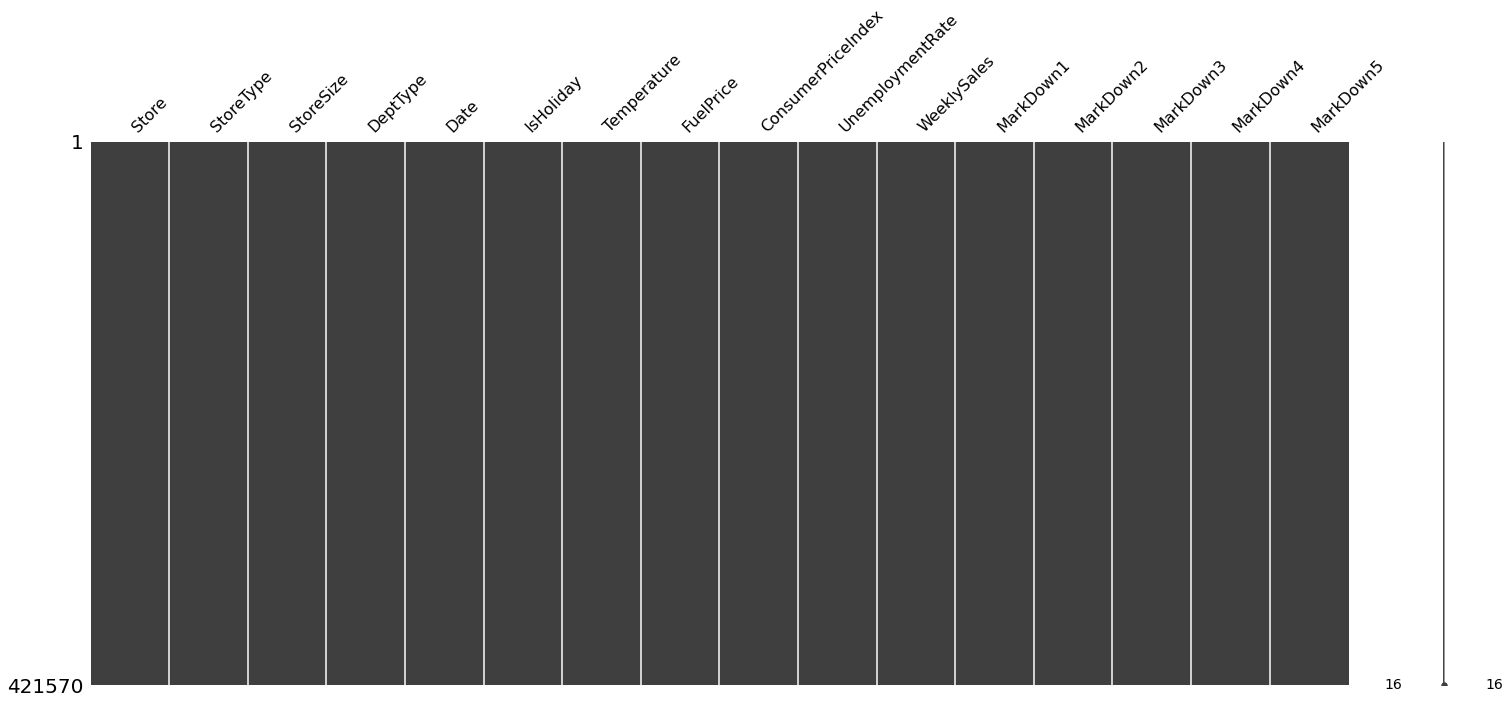

In [5]:
msno.matrix(df)

In [38]:
px.line(df.groupby('Date')[['WeeklySales']].sum())

In [43]:
px.line(df.groupby(['Date', 'StoreType'], as_index = False)[['WeeklySales']].sum(),
    x='Date',
    y='WeeklySales',
    color="StoreType")

In [44]:
df.head()

,Store,StoreType,StoreSize,DeptType,Date,IsHoliday,Temperature,FuelPrice,ConsumerPriceIndex,UnemploymentRate,WeeklySales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1.0,A,151315.0,1.0,2011-01-04,False,59.17,3.524,214.837166,7.682,20398.09,NaN,NaN,NaN,NaN,NaN
1,1.0,A,151315.0,2.0,2011-01-04,False,59.17,3.524,214.837166,7.682,46991.58,NaN,NaN,NaN,NaN,NaN
2,1.0,A,151315.0,3.0,2011-01-04,False,59.17,3.524,214.837166,7.682,8734.19,NaN,NaN,NaN,NaN,NaN
3,1.0,A,151315.0,4.0,2011-01-04,False,59.17,3.524,214.837166,7.682,34451.90,NaN,NaN,NaN,NaN,NaN
4,1.0,A,151315.0,5.0,2011-01-04,False,59.17,3.524,214.837166,7.682,23598.55,NaN,NaN,NaN,NaN,NaN


In [46]:
df[(df.Store==1)&(df.DeptType==1)].sort_values(by=['Store', 'DeptType', 'Date'])

,Store,StoreType,StoreSize,DeptType,Date,IsHoliday,Temperature,FuelPrice,ConsumerPriceIndex,UnemploymentRate,WeeklySales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
211,1.0,A,151315.0,1.0,2010-01-10,False,71.89,2.603,211.671989,7.838,20094.19,NaN,NaN,NaN,NaN,NaN
356,1.0,A,151315.0,1.0,2010-02-04,False,62.27,2.719,210.820450,7.808,57258.43,NaN,NaN,NaN,NaN,NaN
428,1.0,A,151315.0,1.0,2010-02-07,False,80.91,2.669,211.223533,7.787,16333.14,NaN,NaN,NaN,NaN,NaN
6096,1.0,A,151315.0,1.0,2010-02-19,False,39.93,2.514,211.289143,8.106,41595.55,NaN,NaN,NaN,NaN,NaN
8460,1.0,A,151315.0,1.0,2010-02-26,False,46.63,2.561,211.319643,8.106,19403.54,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,1.0,A,151315.0,1.0,2012-10-08,False,85.05,3.494,221.958433,6.908,16119.92,11436.22,245.00,6.85,6964.26,4836.22
6313,1.0,A,151315.0,1.0,2012-10-19,False,67.97,3.594,223.425723,6.573,24185.27,950.33,NaN,4.93,80.25,2312.85
8678,1.0,A,151315.0,1.0,2012-10-26,False,69.16,3.506,223.444251,6.573,27390.81,2585.85,31.75,6.00,1057.16,1305.01
3517,1.0,A,151315.0,1.0,2012-11-05,False,73.77,3.688,221.725663,7.143,18164.20,8351.40,NaN,10.52,2443.14,3127.88


In [58]:
df = df.sort_values(by=['Store', 'DeptType', 'Date'])
df['previous_date'] = df.Date.shift()
df['delta'] = df.previous_date - df.Date
df.loc[df.DeptType != df.DeptType.shift(), 'delta'] = pd.NaT
df[(df.Store==1)&(df.DeptType==1)].sort_values(by=['Store', 'DeptType', 'Date'])

,Store,StoreType,StoreSize,DeptType,Date,IsHoliday,Temperature,FuelPrice,ConsumerPriceIndex,UnemploymentRate,WeeklySales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,delta,previous_date
211,1.0,A,151315.0,1.0,2010-01-10,False,71.89,2.603,211.671989,7.838,20094.19,NaN,NaN,NaN,NaN,NaN,NaT,NaT
356,1.0,A,151315.0,1.0,2010-02-04,False,62.27,2.719,210.820450,7.808,57258.43,NaN,NaN,NaN,NaN,NaN,-25 days,2010-01-10
428,1.0,A,151315.0,1.0,2010-02-07,False,80.91,2.669,211.223533,7.787,16333.14,NaN,NaN,NaN,NaN,NaN,-3 days,2010-02-04
6096,1.0,A,151315.0,1.0,2010-02-19,False,39.93,2.514,211.289143,8.106,41595.55,NaN,NaN,NaN,NaN,NaN,-12 days,2010-02-07
8460,1.0,A,151315.0,1.0,2010-02-26,False,46.63,2.561,211.319643,8.106,19403.54,NaN,NaN,NaN,NaN,NaN,-7 days,2010-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156,1.0,A,151315.0,1.0,2012-10-08,False,85.05,3.494,221.958433,6.908,16119.92,11436.22,245.00,6.85,6964.26,4836.22,-6 days,2012-10-02
6313,1.0,A,151315.0,1.0,2012-10-19,False,67.97,3.594,223.425723,6.573,24185.27,950.33,NaN,4.93,80.25,2312.85,-11 days,2012-10-08
8678,1.0,A,151315.0,1.0,2012-10-26,False,69.16,3.506,223.444251,6.573,27390.81,2585.85,31.75,6.00,1057.16,1305.01,-7 days,2012-10-19
3517,1.0,A,151315.0,1.0,2012-11-05,False,73.77,3.688,221.725663,7.143,18164.20,8351.40,NaN,10.52,2443.14,3127.88,-10 days,2012-10-26


# Einfluss von Attributen auf den Absatz

## Visualisierung

In [60]:
# Temperatur zu Sales
df_viz = df.sample(2000)    # Reduktion des Datenumfangs für die Visualisierung
px.scatter(df_viz, x='Temperature', y='WeeklySales')

## Korrelation

In [62]:
df.corr().round(2)

,Store,StoreSize,DeptType,IsHoliday,Temperature,FuelPrice,ConsumerPriceIndex,UnemploymentRate,WeeklySales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
Store,1.00,-0.18,0.02,-0.00,-0.05,0.07,-0.21,0.21,-0.09,-0.12,-0.04,-0.03,-0.01,-0.03
StoreSize,-0.18,1.00,-0.00,0.00,-0.06,0.00,-0.00,-0.07,0.24,0.35,0.11,0.05,0.17,0.30
DeptType,0.02,-0.00,1.00,0.00,0.00,0.00,-0.01,0.01,0.15,-0.00,0.00,0.00,0.00,0.00
IsHoliday,-0.00,0.00,0.00,1.00,-0.16,-0.08,-0.00,0.01,0.01,-0.04,0.33,0.43,-0.00,-0.05
Temperature,-0.05,-0.06,0.00,-0.16,1.00,0.14,0.18,0.10,-0.00,-0.04,-0.32,-0.10,-0.06,-0.02
FuelPrice,0.07,0.00,0.00,-0.08,0.14,1.00,-0.16,-0.03,-0.00,0.06,-0.22,-0.10,-0.04,-0.13
ConsumerPriceIndex,-0.21,-0.00,-0.01,-0.00,0.18,-0.16,1.00,-0.30,-0.02,-0.06,-0.04,-0.02,-0.05,0.06
UnemploymentRate,0.21,-0.07,0.01,0.01,0.10,-0.03,-0.30,1.00,-0.03,0.05,0.02,0.01,0.02,-0.00
WeeklySales,-0.09,0.24,0.15,0.01,-0.00,-0.00,-0.02,-0.03,1.00,0.09,0.02,0.06,0.05,0.09
MarkDown1,-0.12,0.35,-0.00,-0.04,-0.04,0.06,-0.06,0.05,0.09,1.00,0.02,-0.11,0.82,0.16


<AxesSubplot:>

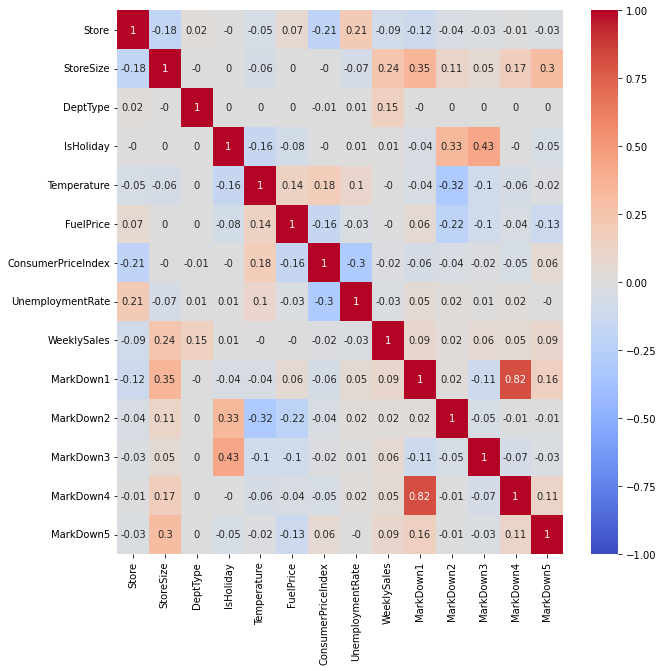

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(1, (10,10))
sns.heatmap(df.corr().round(2), annot =True, vmin = -1, vmax=1, center = 0, cmap='coolwarm')

## Zusammenhang zwischen Markdown und Absatz analysieren
Bei welchen Stores/DeptType haben unsere Preisrabatte (=Markdown) einen starken Einfluss auf den Absatz? (Top 10)

In [80]:
df_sales_count = df.groupby(['Store', 'DeptType'], as_index = False)[['MarkDown1']].count().rename(columns={'MarkDown1': 'NoOfMarkDown'})
df_sales_count

#df[['WeeklySales', 'MarkDown1']].corr()
# Reset Index löst unsere Korrelationsmatrix und Gruppierungsindexe auf
df_corr_by_group = df.groupby(['Store', 'DeptType'])[['WeeklySales', 'MarkDown1']].corr().reset_index()
df_corr_by_group = df_corr_by_group[df_corr_by_group.level_2 == 'WeeklySales']
df_corr_by_group = df_corr_by_group.rename(columns={'MarkDown1': 'CorrSalesMD1'})

df_corr_by_group = pd.merge(df_corr_by_group, df_sales_count)
df_corr_by_group[df_corr_by_group.NoOfMarkDown > 10].sort_values(by='CorrSalesMD1', ascending=False)


,Store,DeptType,level_2,WeeklySales,CorrSalesMD1,NoOfMarkDown
1802,24.0,45.0,WeeklySales,1.0,0.753622,14
443,6.0,87.0,WeeklySales,1.0,0.584132,51
66,1.0,87.0,WeeklySales,1.0,0.583835,51
1520,20.0,87.0,WeeklySales,1.0,0.564053,51
589,8.0,79.0,WeeklySales,1.0,0.557044,51
...,...,...,...,...,...,...
1337,18.0,45.0,WeeklySales,1.0,-0.397394,11
799,11.0,47.0,WeeklySales,1.0,-0.461841,11
2735,37.0,20.0,WeeklySales,1.0,-0.480483,21
1194,16.0,58.0,WeeklySales,1.0,-0.517788,12


In [82]:
store =6
dept = 87
px.scatter(df[(df.Store==store)&(df.DeptType==dept)], x='MarkDown1', y='WeeklySales')